# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lon = []
max_temp = []
humidity = []
cloudiness =[]
wind_speed = []
date=[]
country = []
citi = []

print(f'Beginning Data Retrieval')
print(f'-------------------------------')
for city in cities:
    response=requests.get(query_url + city).json()
      
    try:
        print(f"Processing Record {len(citi)+1} | {city}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        citi.append(response['name'])
        
    except KeyError:
        print(f"City not found. Skipping...")
        
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f'-------------------------------')
pprint(response)



Beginning Data Retrieval
-------------------------------
Processing Record 1 | punta arenas
Processing Record 2 | port alfred
Processing Record 3 | pevek
Processing Record 4 | rikitea
Processing Record 5 | chongwe
Processing Record 6 | katsuura
Processing Record 7 | okhotsk
Processing Record 8 | ushuaia
Processing Record 9 | busselton
Processing Record 10 | kodiak
Processing Record 11 | klaksvik
Processing Record 12 | mataura
Processing Record 13 | olinda
Processing Record 14 | bredasdorp
Processing Record 15 | adet
Processing Record 16 | richards bay
Processing Record 17 | falealupo
City not found. Skipping...
Processing Record 17 | yellowknife
Processing Record 18 | albany
Processing Record 19 | nunoa
Processing Record 20 | gorom-gorom
Processing Record 21 | bluff
Processing Record 22 | kodinar
Processing Record 23 | nouadhibou
Processing Record 24 | hamilton
Processing Record 25 | boralday
Processing Record 26 | vaini
Processing Record 27 | necochea
Processing Record 28 | cayenne
Pr

Processing Record 219 | buin
Processing Record 220 | matehuala
Processing Record 221 | meyungs
City not found. Skipping...
Processing Record 221 | port elizabeth
Processing Record 222 | bolungarvik
City not found. Skipping...
Processing Record 222 | bahia honda
Processing Record 223 | borova
Processing Record 224 | saurimo
Processing Record 225 | dikson
Processing Record 226 | umzimvubu
City not found. Skipping...
Processing Record 226 | sabang
Processing Record 227 | terney
Processing Record 228 | hithadhoo
Processing Record 229 | espanola
Processing Record 230 | filingue
Processing Record 231 | ostrovnoy
Processing Record 232 | hambantota
Processing Record 233 | seoul
Processing Record 234 | khonuu
City not found. Skipping...
Processing Record 234 | machinga
Processing Record 235 | kavieng
Processing Record 236 | yichang
Processing Record 237 | karak
Processing Record 238 | pegnitz
Processing Record 239 | neiafu
Processing Record 240 | aloleng
Processing Record 241 | bereda
Processin

Processing Record 439 | nola
Processing Record 440 | tsiroanomandidy
Processing Record 441 | juneau
Processing Record 442 | labuhan
Processing Record 443 | bima
Processing Record 444 | tamano
Processing Record 445 | port macquarie
Processing Record 446 | deniliquin
Processing Record 447 | borba
Processing Record 448 | sarangani
Processing Record 449 | portland
Processing Record 450 | georgiyevskoye
Processing Record 451 | cururupu
Processing Record 452 | neosho
Processing Record 453 | kholodnyy
Processing Record 454 | ndungu
Processing Record 455 | kouango
Processing Record 456 | chama
Processing Record 457 | batsfjord
Processing Record 458 | soyo
Processing Record 459 | snyder
Processing Record 460 | mendahara
City not found. Skipping...
Processing Record 460 | llanes
Processing Record 461 | miles city
Processing Record 462 | adolfo lopez mateos
Processing Record 463 | a
City not found. Skipping...
Processing Record 463 | dong hoi
Processing Record 464 | socorro
Processing Record 465 

In [5]:
citi

['Punta Arenas',
 'Port Alfred',
 'Pevek',
 'Rikitea',
 'Chongwe',
 'Katsuura',
 'Okhotsk',
 'Ushuaia',
 'Busselton',
 'Saint Paul Harbor',
 'Klaksvík',
 'Mataura',
 'Olinda',
 'Bredasdorp',
 'Adet',
 'Richards Bay',
 'Yellowknife',
 'Albany',
 'Ñuñoa',
 'Gorom-Gorom',
 'Bluff',
 'Kodīnar',
 'Nouadhibou',
 'Hamilton',
 'Boralday',
 'Vaini',
 'Necochea',
 'Cayenne',
 'Malanje',
 'Hermanus',
 'Cape Town',
 'Hobart',
 'Hilo',
 'Mitchell',
 'Aleksandrov Gay',
 'Bonthe',
 'Tiksi',
 'Ivanivka',
 'Lata',
 'Alta Floresta',
 'Fortuna',
 'Dunedin',
 'Saskylakh',
 'Puerto Ayora',
 'Shelburne',
 'Torbay',
 'Qaanaaq',
 'Ponta do Sol',
 'Kapaa',
 'Mossamedes',
 'Tessalit',
 'Banes',
 'Iqaluit',
 'Saint-Philippe',
 'Yeniseysk',
 'São Geraldo do Araguaia',
 'Avarua',
 'Riorges',
 "Tegul'det",
 'Kamaishi',
 'Törtel',
 'Mar del Plata',
 'Mildura',
 'Butaritari',
 'Salò',
 'Lasem',
 'Montepuez',
 'Bambous Virieux',
 'Norman Wells',
 'Santa Fe',
 'Bethel',
 'Hong Kong',
 'Gamba',
 'Shiraz',
 'Batagay-Alyt

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
citi_dict = {
    "City": citi,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
citi_df = pd.DataFrame(citi_dict)
citi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,12.00,62,75,13.90,CL,1604096032
1,Port Alfred,-33.59,26.89,14.78,65,79,1.44,ZA,1604095841
2,Pevek,69.70,170.31,-6.03,95,91,2.74,RU,1604095928
3,Rikitea,-23.12,-134.97,24.51,67,0,3.36,PF,1604095786
4,Chongwe,-15.33,28.68,23.00,33,0,0.50,ZM,1604096033


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
citi_summary = citi_df.describe()
citi_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.352825,20.079393,14.640589,72.493934,52.103986,3.414246,1.604096e+09
std,32.856950,90.142365,12.414697,20.918502,39.980850,2.377471,1.066864e+02
min,-54.800000,-175.200000,-25.240000,12.000000,0.000000,0.130000,1.604095e+09
25%,-7.750000,-56.150000,6.110000,62.000000,5.000000,1.590000,1.604096e+09
50%,22.890000,20.970000,18.000000,78.000000,59.000000,2.840000,1.604096e+09
75%,47.870000,102.500000,25.000000,88.000000,90.000000,4.470000,1.604096e+09
max,78.220000,179.320000,32.000000,100.000000,100.000000,15.120000,1.604096e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

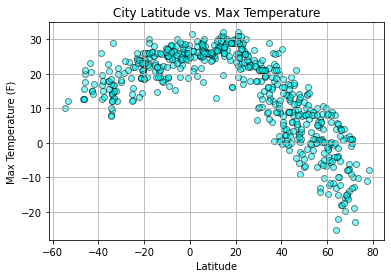

In [31]:
lat_x = citi_df["Lat"]

temp_y = citi_df["Max Temp"]

plt.scatter(lat_x, temp_y, marker = 'o', facecolors = 'cyan',
            edgecolors = 'black', alpha = 0.50)
plt.grid(True)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

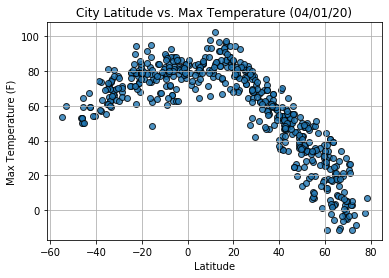

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

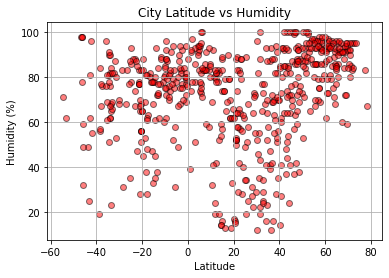

In [32]:
humidity_y = citi_df["Humidity"]

plt.scatter(lat_x, humidity_y, marker = 'o', facecolor = 'red',
            edgecolor = 'black', alpha = 0.50)
plt.grid(True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

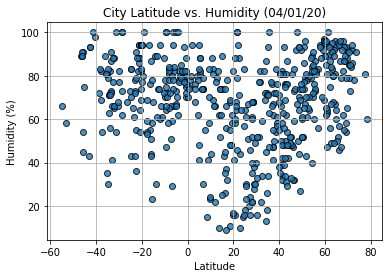

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

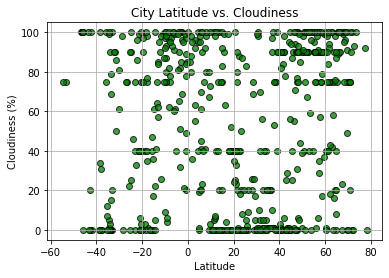

In [36]:
cloudy_y = citi_df["Cloudiness"]

plt.scatter(lat_x, cloudy_y, marker = 'o', facecolor = 'green',
        edgecolor = 'black', alpha = 0.75)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

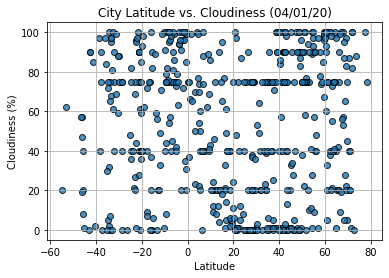

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

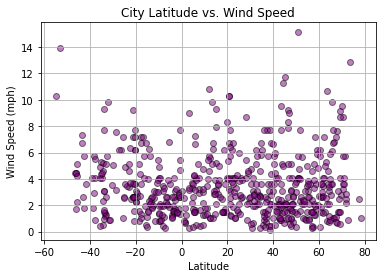

In [38]:
speed_y = citi_df["Wind Speed"]

plt.scatter(lat_x, speed_y, marker = 'o', facecolor = 'purple', edgecolor = 'black',
           alpha = .5)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

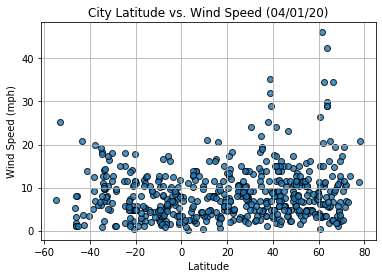

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.759789061948516


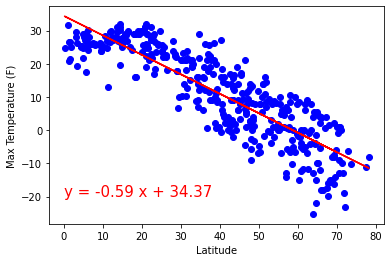

In [44]:
n_lat = citi_df.loc[citi_df["Lat"]>0]
n_lat
x_axis = n_lat["Lat"]
y_axis = n_lat["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-value is: 0.46937863826630627


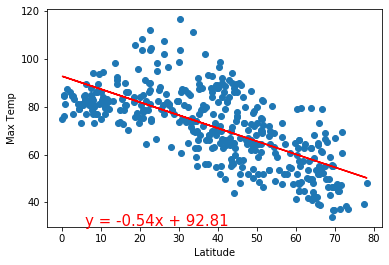

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4547017807484989


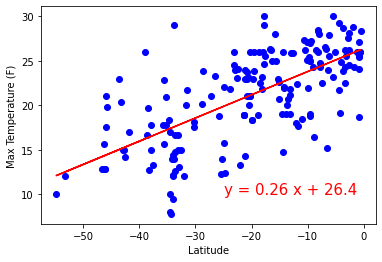

In [47]:
s_lat = citi_df.loc[citi_df["Lat"]<0]
s_lat
x_axis = s_lat["Lat"]
y_axis = s_lat["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.6082708688906918


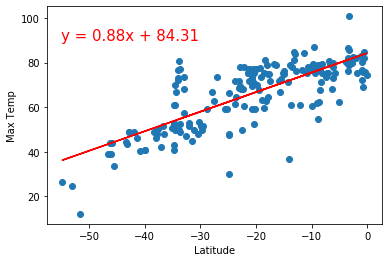

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10857903842043644


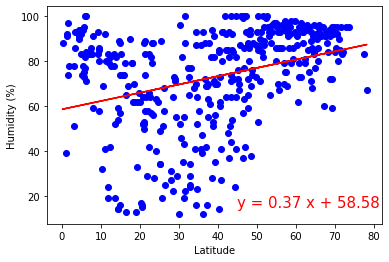

In [50]:
n_lat = citi_df.loc[citi_df["Lat"]>0]
n_lat
x_axis = n_lat["Lat"]
y_axis = n_lat["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.000543987878808455


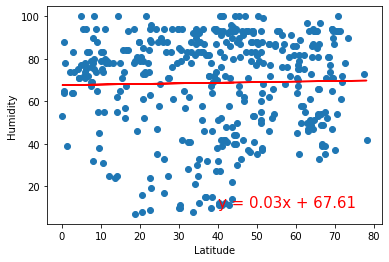

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027791344386498135


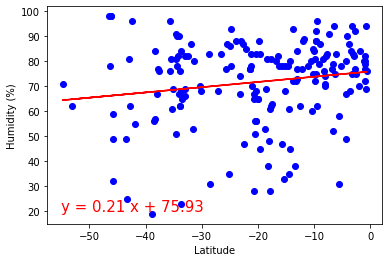

In [51]:
s_lat = citi_df.loc[citi_df["Lat"]<0]
s_lat
x_axis = s_lat["Lat"]
y_axis = s_lat["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.014985174297345524


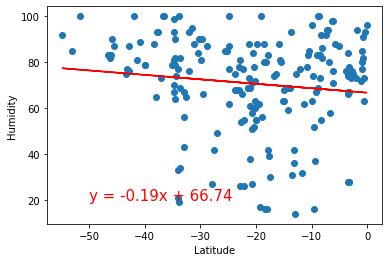

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.044714243817829756


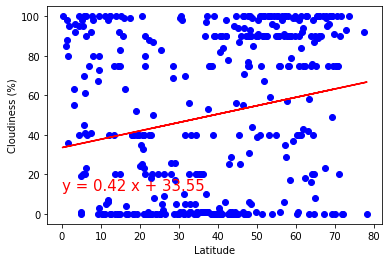

In [54]:
n_lat = citi_df.loc[citi_df["Lat"]>0]
n_lat
x_axis = n_lat["Lat"]
y_axis = n_lat["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.0020898727664228514


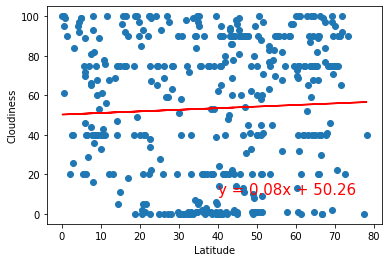

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06214371265814102


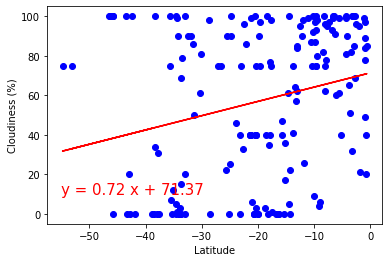

In [60]:
s_lat = citi_df.loc[citi_df["Lat"]<0]
s_lat
x_axis = s_lat["Lat"]
y_axis = s_lat["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.0035263772085582894


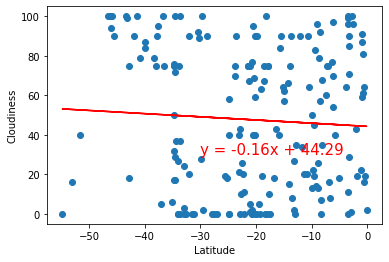

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009845039784765663


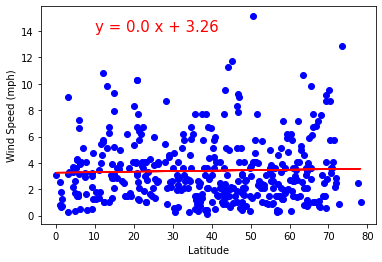

In [57]:
n_lat = citi_df.loc[citi_df["Lat"]>0]
n_lat
x_axis = n_lat["Lat"]
y_axis = n_lat["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.04019723576144484


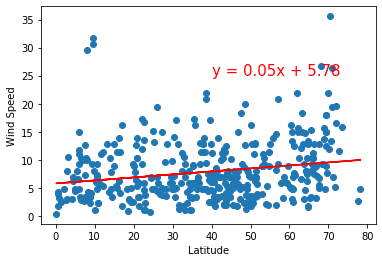

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11007177845732613


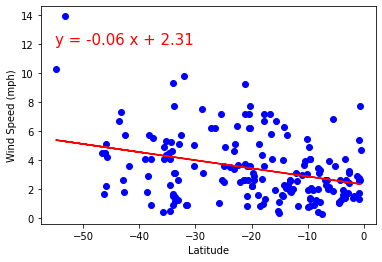

In [59]:
s_lat = citi_df.loc[citi_df["Lat"]<0]
s_lat
x_axis = s_lat["Lat"]
y_axis = s_lat["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) +" x + " +str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker = 'o', color = 'b')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,12),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.017128274759839232


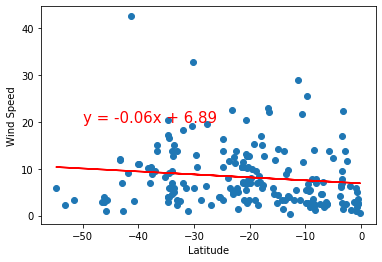